1- most high avg rated movies (to get propeties)<br>
    - what are most pop movies and what are their properties<br>
(cast, genres, time, director, release_year, runtime)<br>
2- relation btwn revenue and voting<br>
3- properties of movies with high revenues<br>
4- most cost movies <br>
    - what are top 10 non-costed movies with top voting? <br>
    - line to describe profits of top 20 voting <br>
5- runtime affect voting *insight* (avg of time over decades),(avg vote over decades)<br>
6- number of movies over decades
7- popular genre per year *insight*


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# read DS
df = pd.read_csv('tmdb-movies.csv')
# drop unnecessary columns
df.drop(columns={'id', 'imdb_id', 'homepage', 'overview', 'release_date', 'keywords', 'tagline','production_companies', 'budget_adj', 'revenue_adj', 'popularity'}, inplace=True)
# drop duplicated columns
df.drop_duplicates(inplace=True)
# drop null values
df.dropna(inplace=True)
# drop rows with non logical values
df.drop(index=df[df['revenue']<=1000].index, inplace=True)
df.drop(index=df[(df['budget']<=1000)].index, inplace=True)
# df.isnull().sum()
# calc profit of each movie
df['%profit'] = ((df['revenue']-df['budget'])/df['budget']).apply(lambda x: x*100)
df['Decade'] = df['release_year'].apply(lambda x: str(x)[:3] + "0")
# df[['%profit', 'budget', 'revenue']].sort_values(by='%profit', ascending=False) 

df[(df['budget'] >= df['budget'].mean()) & (df['revenue'] >= df['revenue'].mean()) & (df['vote_count'] >= df['vote_count'].mean())].sort_values(by=['vote_average', '%profit'], ascending=False)


,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,%profit,Decade
4179,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,Comedy|Drama|Romance,4856,8.1,1994,1132.627998,1990
2875,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,8432,8.1,2008,441.579365,2000
9,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,3935,8.0,2015,387.833491,2010
2414,60000000,284600000,The Green Mile,Tom Hanks|Michael Clarke Duncan|David Morse|Bo...,Frank Darabont,189,Fantasy|Drama|Crime,2299,8.0,1999,374.333333,1990
629,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,6498,8.0,2014,276.819685,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6593,100000000,249288105,Eragon,Ed Speleers|Jeremy Irons|Sienna Guillory|Rober...,Stefen Fangmeier,104,Fantasy|Action|Adventure|Family,536,4.8,2006,149.288105,2000
3420,57000000,149217355,Ghost Rider: Spirit of Vengeance,Nicolas Cage|CiarÃ¡n Hinds|Violante Placido|Fe...,Mark Neveldine|Brian Taylor,95,Action|Fantasy|Thriller,752,4.7,2011,161.784833,2010
1961,150000000,318502923,The Last Airbender,Noah Ringer|Nicola Peltz|Jackson Rathbone|Dev ...,M. Night Shyamalan,103,Action|Adventure|Family|Fantasy,732,4.7,2010,112.335282,2010
5236,125000000,238207122,Batman & Robin,Arnold Schwarzenegger|George Clooney|Chris O'D...,Joel Schumacher,125,Action|Crime|Fantasy|Science Fiction,828,4.4,1997,90.565698,1990


functions to avoid repeating codes

In [14]:
# find top 10 with passing filter
def top_10_fn (df, filter):
    mid_high = df[filter].quantile(.75)
    filtered_movs = df[df[filter] >= mid_high]
    top_10_values = filtered_movs.sort_values(by=filter, ascending=False).head(10)
    return top_10_values

# get names of movie's cast
def get_names(df, filter):
    cast_names = []
    df_cast = df[filter]
    for i in np.arange(10):
        element = df_cast.iloc[i] # get row by row
        char_count = element.count('|')+1 # to get all genres names
        for j in np.arange(char_count): # inner loop to split string with delimter to get names
            name = element.split('|')[j] # get name by name 
            cast_names.append(name)
    return cast_names

# count names to find top filtered by
def count_names(list):
    dict = {}
    for i in list:
        b = list.count(i)
        dict.update({i:b})

    return sorted(dict.items(), key=lambda x:x[1], reverse=True)

Q1: Top 10 high avg rated movies

In [23]:
# 1- top vote_average movies (propertise)
vote_10 = top_10_fn(df, 'vote_average')
# properties of movies with pop
# vote_10[['director', 'cast', 'genres', 'runtime', 'release_year', 'vote_average', '%profit']]
#------------------------
# vote_10.director.value_counts()
# one repeated director
#------------------------
# vote_10.cast.value_counts()
# no repeated names
#------------------------
# top voted genres
voted_gnames = get_names(vote_10, 'genres') # names of genres
voted_topg = count_names(voted_gnames)[:3] # top 3 rated genres
# print(voted_topg)
#------------------------
vote_10[['original_title','vote_average', '%profit']].sort_values(by= ['vote_average','%profit'], ascending=False)



,original_title,vote_average,%profit
7948,Stop Making Sense,8.4,314.910167
4178,The Shawshank Redemption,8.4,13.365876
7269,The Godfather,8.3,3984.440183
650,Whiplash,8.2,324.033121
4177,Pulp Fiction,8.1,2574.109525
10222,Schindler's List,8.1,1360.298945
4179,Forrest Gump,8.1,1132.627998
2875,The Dark Knight,8.1,441.579365
9758,The Godfather: Part II,8.1,265.714162
2409,Fight Club,8.1,60.085322


Q2: relation btwn revenue and voting

Text(0, 0.5, 'Revenue')

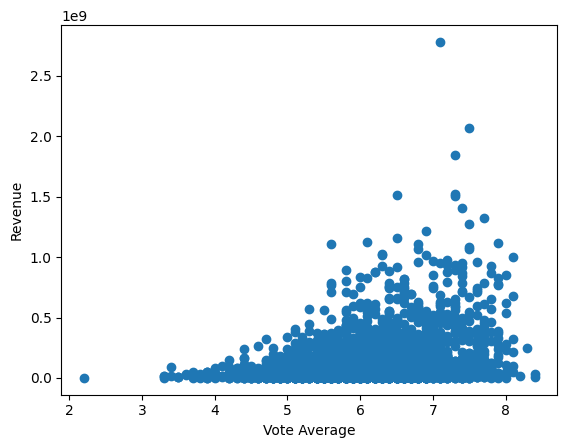

In [6]:
# 2- relation between voting and revenue
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
# weak p+ correlation

Q3: properties of movies with high revenues

In [26]:
# 3- top revenue properties
rev_10 = top_10_fn(df, 'revenue')
# rev_10[['runtime', 'release_year', '%profit']].sort_values(by='%profit', ascending=False)
rev_10.sort_values(by=['vote_average','%profit'], ascending=False)


,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,%profit,Decade
3374,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,3750,7.7,2011,962.254258,2010
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,934.089113,2010
5422,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,3369,7.5,2013,749.479339,2010
14,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,4304,7.4,2015,401.798488,2010
5231,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,4654,7.3,1997,822.517094,1990
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,692.762821,2010
4361,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,8903,7.3,2012,590.708141,2010
1386,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,1073.631159,2000
5425,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130,Action|Adventure|Science Fiction,6882,6.9,2013,507.719997,2010
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,909.019207,2010


In [8]:
# 4- Most costed movies
cost_10 = top_10_fn(df, 'budget')
cost_10

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,%profit,Decade
2244,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,-97.391160,2010
3375,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,3180,6.3,2011,168.863947,2010
7387,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,2626,6.8,2007,220.333333,2000
14,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,4304,7.4,2015,401.798488,2010
6570,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,834,5.3,2006,44.844886,2000
4411,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,Andrew Stanton,132,Action|Adventure|Fantasy|Science Fiction,1479,6.0,2012,9.284269,2010
1929,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,100,Animation|Family,2019,7.3,2010,127.613437,2010
7394,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,139,Fantasy|Action|Adventure,2083,5.8,2007,245.299080,2000
5508,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,1607,6.0,2013,-64.984349,2010
4363,250000000,1081041287,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,165,Action|Crime|Drama|Thriller,6723,7.5,2012,332.416515,2010


Q5.1: Runtime affect voting? (avg of time over Decade)

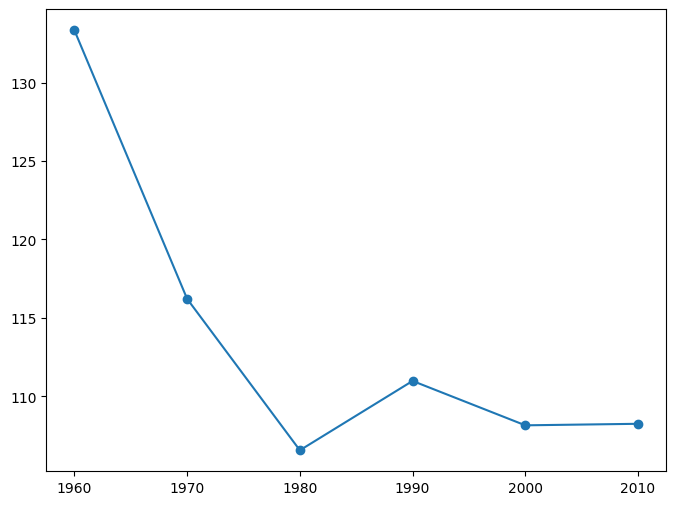

In [39]:
runtimeOverDecade = df.groupby('Decade')['runtime'].mean()
x = runtimeOverDecade.index
y = runtimeOverDecade.values

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')

Q5.2: (avg voting over Decades)

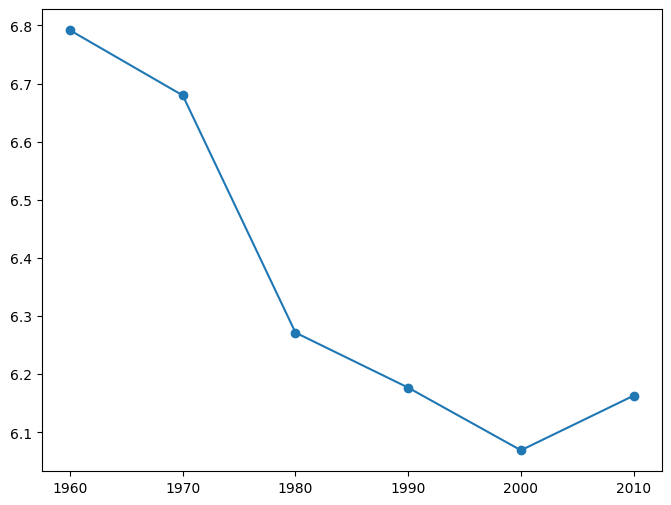

In [41]:
votingOverDecade = df.groupby('Decade')['vote_average'].mean()
x = votingOverDecade.index
y = votingOverDecade.values

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')

Q6: Number of movies over decades

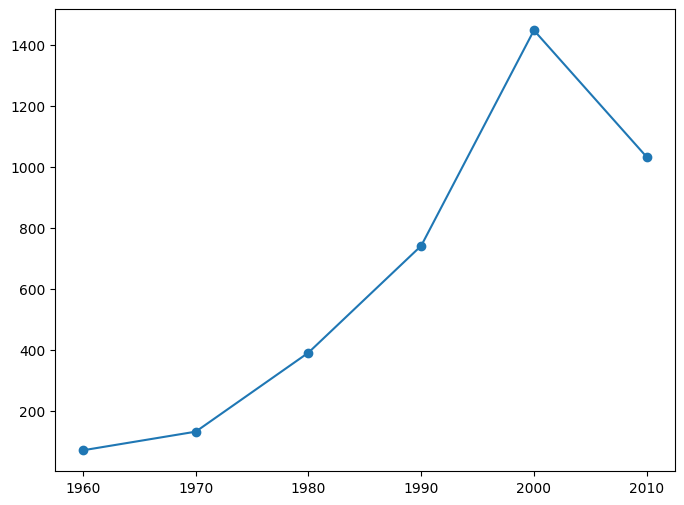

In [ ]:
# 6- Highest decade with # movies
noMovies = df.groupby(['Decade'])['original_title'].count()#.hist()
x = noMovies.index
y = noMovies.values

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')


Q6: Top rated Genres over years

In [7]:
genresDF = pd.DataFrame(df.groupby(['Decade', 'genres'])['vote_average'].max().reset_index())

genresDF.groupby(['Decade']).max()

,genres,vote_average
Decade,,
1960,Western|Action|Adventure|Drama,8.0
1970,Thriller,8.3
1980,Western|History,8.4
1990,Western,8.4
2000,Western|History|War,8.1
2010,Western|Thriller,8.2


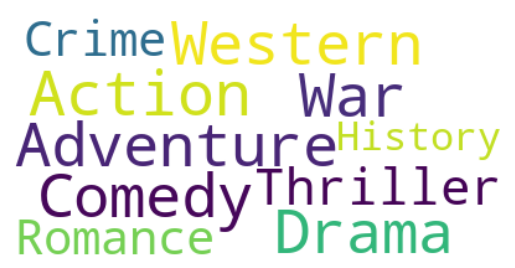

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
names = count_names(get_names(genresDF,'genres'))
text = " ".join(name[0] for name in names)
wCloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wCloud, interpolation="bilinear")
plt.axis("off")
plt.show()